# Introduction 
Our aim in the battery energy-related mission success/failure prediction process is to predict the occurrence of the battery's EoD, which is defined as the time at which the SoC of the battery falls below a pre-defined threshold value. SoC of a battery is typically defined as 1 when the battery is fully charged and 0 when the battery is discharged to a predetermined voltage threshold. Such a task is known as prognostics, and we adopted model-based prognostics architecture from [1]. 

The battery model utilized in this study is an electro-chemical-based model of Lithium-ion batteries, as described in [1], which are a popular choice for powering unmanned aerial vehicles. In this model, the battery's current draw ($I$) serves as the input, while the battery temperature ($tb$) and the voltage drop caused by solid-phase ohmic resistance ($V_o$) represent its outputs ($y(k)$).

# Prognostics Architecture 
The prognostics architecture comprises two major steps: estimation and prediction. the joint state-parameter estimate $p(x(k), \theta(k)|y(k_0:k))$ is computed using the system dynamics and observation history up to time $k$ represented as $y(k_0:k)$. On the other hand, in the prediction step, the probability distribution $p(k_E(k_P)|y(k_0:k_P))$ at prediction time $k_p$ is computed using the joint state-parameter estimate and hypothesized future inputs of the system. The estimation algorithm used in this paper is the Uncented Kalman Filter, along with the battery model. The UKF uses sigma points which are deterministic points that are used to represent the joint state-parameter distribution $p(x(k), \theta(k),|y(k_0:k))$. The predictor algorithm used in this paper is the Monte Carlo predictor, which randomly samples from the battery's current state distribution, and each sample is simulated to the EoD.  By collecting a set of EoD points from several Monte Carlo simulations, the probability distribution can be built, and the probability of mission success at a given time can be computed using the following equation:

\begin{equation}\label{eq:success_proba}
    P_{success}(time) = \frac{\sum_{i=1}^n (EOD(i) > time)}{n}
\end{equation}
$n$ represents the number of Monte Carlo simulations in the prediction step.

# EoD Prediction Procedure



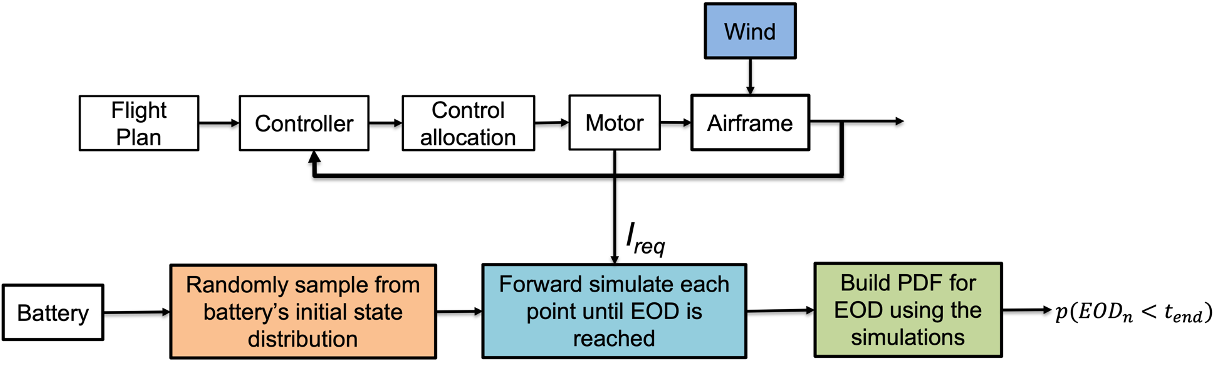



The battery EoD prediction process is illustrated in the above figure. According to the procedure, given a flight plan and information about the available battery energy, the first step is to obtain the wind forecast along the 4-D trajectory of the flight plan. After collecting the wind data, the aircraft is simulated along the flight plan to obtain the mission's current requirement ($I_{req}$), which is used as a future load for battery EoD prediction. Next, the UKF-based estimator is employed to obtain the initial state distribution of the battery. Once the initial state distribution of the battery is obtained, samples are randomly drawn from the distribution, and the EoD is predicted for each sample using the Monte Carlo predictor. Finally, the predicted EoD points are collected, and the probability density function for battery EoD at the flight end time is constructed.

# Experiment Results 

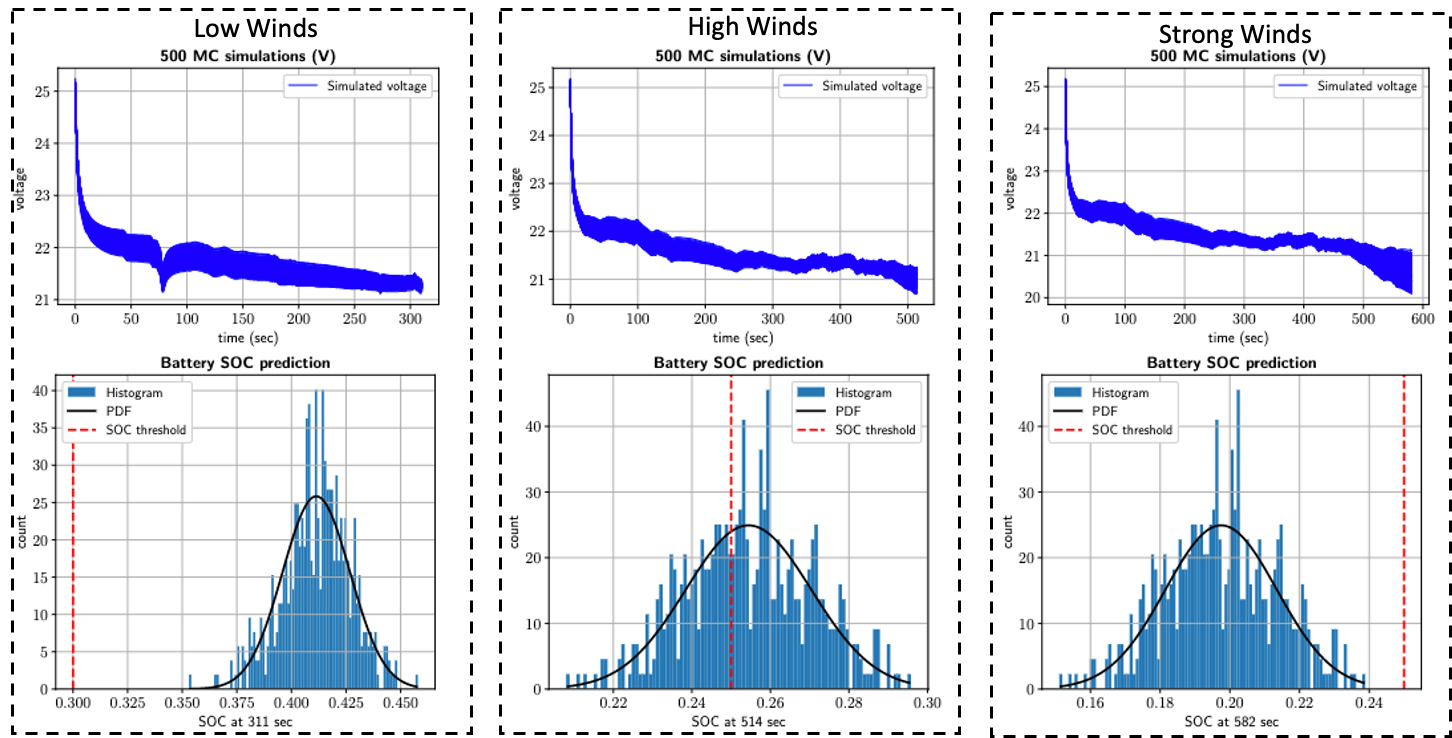

[1] https://papers.phmsociety.org/index.php/phmconf/article/view/2252

# Instructions to use the codebase

To conduct prognostics experiments and obtain accurate results from this codebase, please follow these instructions:


1. Simulate the aircraft model based on the desired experimental conditions, such as trajectory type, wind conditions, and control scheme. Determine the current requirement for the mission you wish to study.
2. Incorporate the current requirement into the `battery_prognostics.py` file as an input for the battery model.
3. Open your terminal and activate the working environment that contains all the necessary packages, including `prog_algs` and `prog_models`. Use the following command to activate the environment:
    - `conda activate 'env'`
    
4. Run the `battery_prognostics.py` script with the desired number of simulations (denoted by "number_of_simulations") using the following command:
    - `python battery_prognostics.py --N=number_of_simulations`
5. After the experiment is complete, the results will be saved in the `mc_results.pkl` file. Import this pickle file and visualize the results by plotting them.